# 📝 Exploratory Data Analysis
---
Analyzing dataset for any imbalances and whatsoever.

In [19]:
import os

datapath = r'C:\Users\Melzarr\OneDrive\Desktop\THESIS\sp_multilabel_vggtc\data_collection\final_collection\final_data2'

In [20]:
import pandas as pd
import numpy as np
import json

firstdata = datapath + r'\data0_s40856.csv'

vgame0_df = pd.read_csv(firstdata)

In [21]:
vgame0_df.head(10)

,id,name,summary,genre_count,genre_list,genre_ids
0,1,Thief II: The Metal Age,The ultimate thief is back! Tread softly as yo...,3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]"
1,2,Thief: The Dark Project,Thief is a first-person stealth game that like...,2,"['Simulator', 'Adventure']","[13, 31]"
2,3,Thief: Deadly Shadows,"In the third instalment of the Thief series, m...",3,"['Shooter', 'Simulator', 'Adventure']","[5, 13, 31]"
3,4,Thief,There is a rising tide of fear in The City. Ha...,2,"['Shooter', 'Adventure']","[5, 31]"
4,5,Baldur's Gate,Baldur's Gate is a fantasy role-playing video ...,1,['Role-playing (RPG)'],[12]
5,6,Baldur's Gate II: Shadows of Amn,Every World has conflict. Good and evil. Frien...,1,['Role-playing (RPG)'],[12]
6,7,Jagged Alliance,Desperately you are called to the island of Me...,4,"['Role-playing (RPG)', 'Strategy', 'Turn-based...","[12, 15, 16, 24]"
7,8,Jagged Alliance: Deadly Games,The enemy is on the run. One more mortar shell...,4,"['Role-playing (RPG)', 'Strategy', 'Turn-based...","[12, 15, 16, 24]"
8,9,Jagged Alliance 2,Jagged Alliance 2 is a perfect blend of strate...,5,"['Role-playing (RPG)', 'Strategy', 'Turn-based...","[12, 15, 16, 24, 31]"
9,10,Jade Empire: Special Edition,Step into the role of an aspiring martial-arts...,2,"['Role-playing (RPG)', 'Adventure']","[12, 31]"


## Genre Count Frequencies
---

1     16496
2     13461
3      7045
4      2786
5       828
6       186
7        39
8        10
9         2
10        2
20        1
Name: genre_count, dtype: int64
40856


<AxesSubplot: >

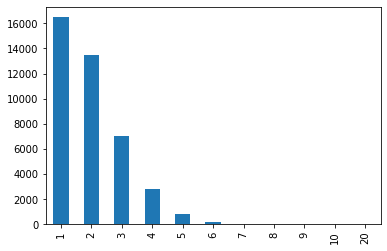

In [22]:
genrecount_freq = pd.value_counts(vgame0_df['genre_count'])
print(genrecount_freq)
print(genrecount_freq.sum())

genrecount_freq.plot(kind='bar')

In [23]:
type(genrecount_freq)

sum = 0
for i in genrecount_freq.index:
    print(f'{i} * {genrecount_freq[i]}')
    sum += i * genrecount_freq[i]
print(sum)

1 * 16496
2 * 13461
3 * 7045
4 * 2786
5 * 828
6 * 186
7 * 39
8 * 10
9 * 2
10 * 2
20 * 1
81364


## Testing `literal_eval()` and `explode()`
---
`literal_eval()` turns the stringified list to Pythonic list  
`explode()` used to separate tags in each game ids

In [24]:
from ast import literal_eval 

test_df = vgame0_df.copy()
test_df = test_df[["id", "genre_list"]]
test_df['genre_list'] = test_df['genre_list'].apply(literal_eval)
test_df

,id,genre_list
0,1,"[Shooter, Simulator, Adventure]"
1,2,"[Simulator, Adventure]"
2,3,"[Shooter, Simulator, Adventure]"
3,4,"[Shooter, Adventure]"
4,5,[Role-playing (RPG)]
...,...,...
40851,49994,[Sport]
40852,49995,[Sport]
40853,49997,[Puzzle]
40854,49998,[Sport]


In [25]:
hello = test_df.explode('genre_list').reset_index(drop=True)
hello

,id,genre_list
0,1,Shooter
1,1,Simulator
2,1,Adventure
3,2,Simulator
4,2,Adventure
...,...,...
81359,49994,Sport
81360,49995,Sport
81361,49997,Puzzle
81362,49998,Sport


In [27]:
hello['genre_list'].value_counts()

Adventure                     12958
Indie                         11677
Strategy                       7325
Role-playing (RPG)             6557
Simulator                      6475
Shooter                        6332
Puzzle                         4812
Sport                          4684
Platform                       4469
Arcade                         3572
Racing                         2784
Fighting                       2095
Hack and slash/Beat 'em up     1365
Real Time Strategy (RTS)       1102
Turn-based strategy (TBS)      1095
Point-and-click                 865
Tactical                        858
Music                           701
Visual Novel                    543
Quiz/Trivia                     440
Card & Board Game               384
Pinball                         246
MOBA                             25
Name: genre_list, dtype: int64